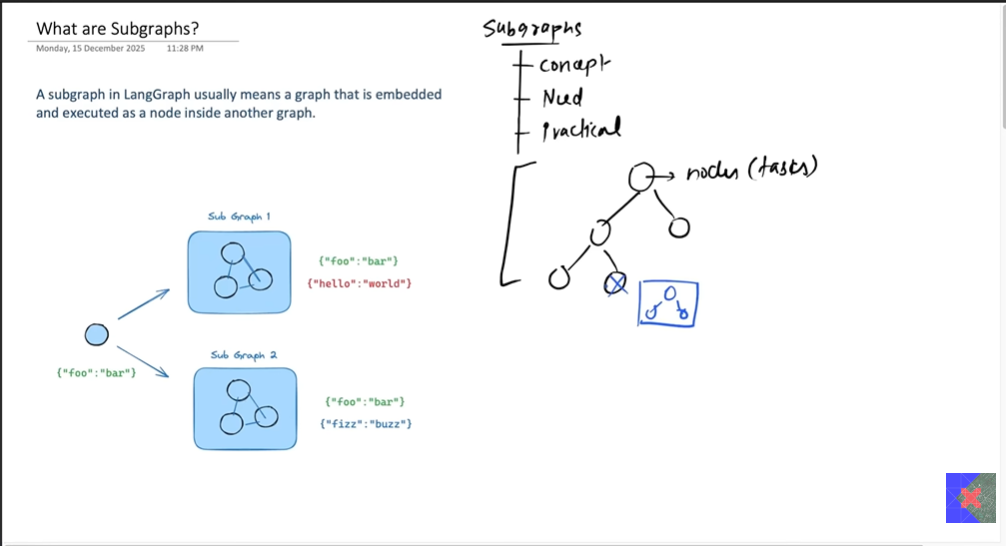

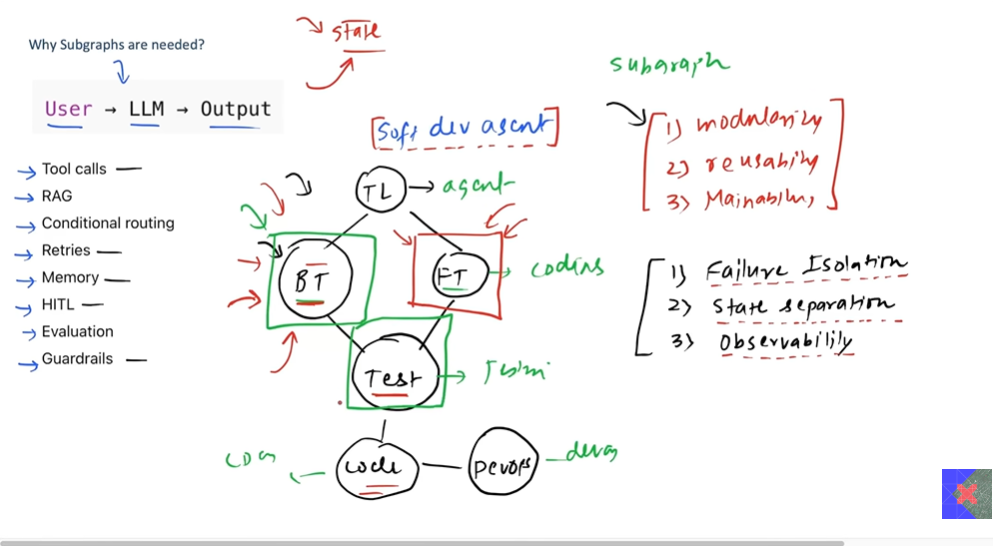

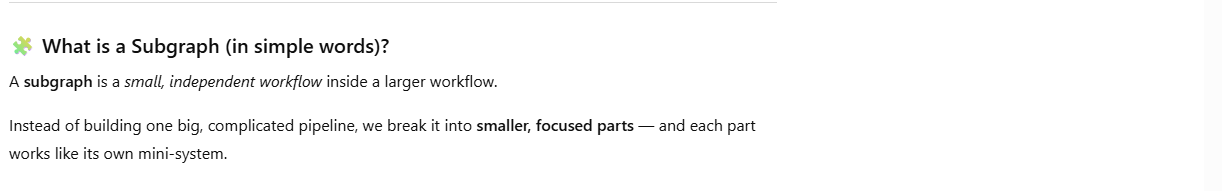

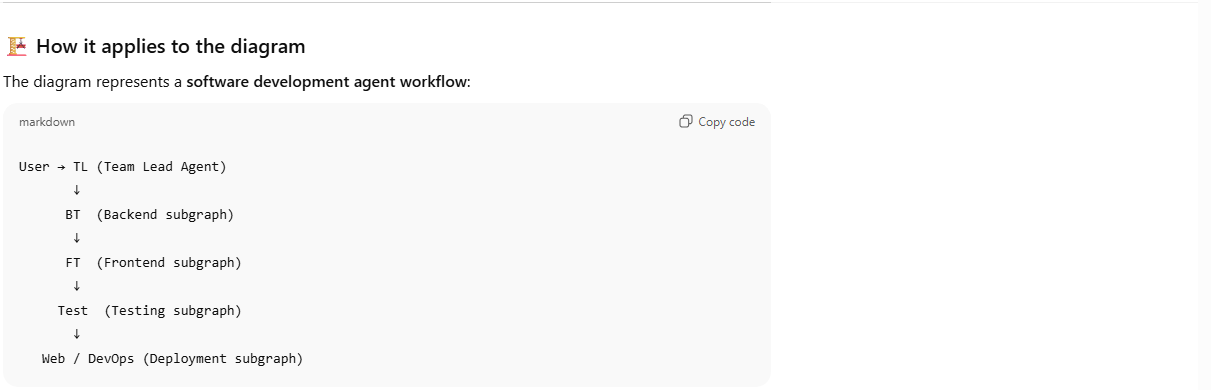

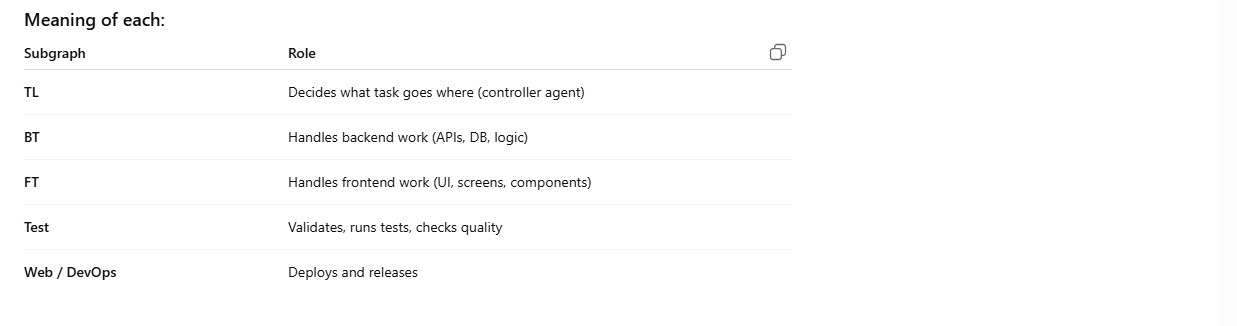

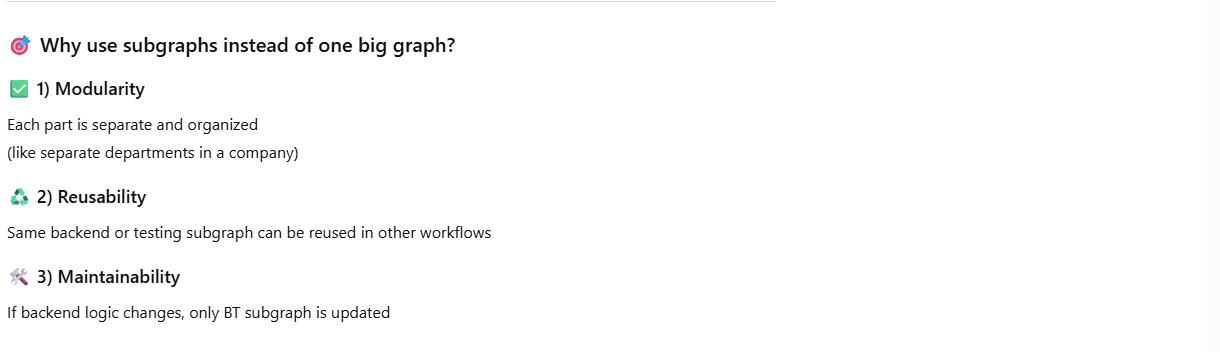

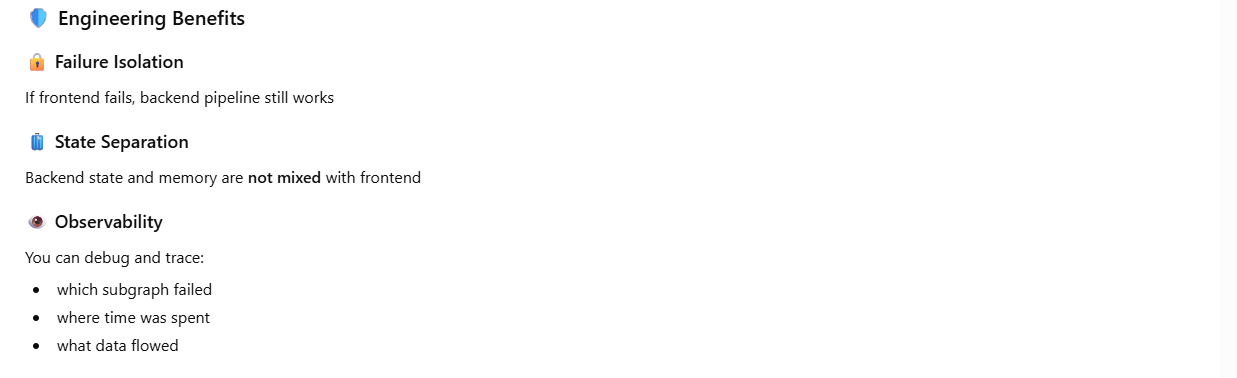

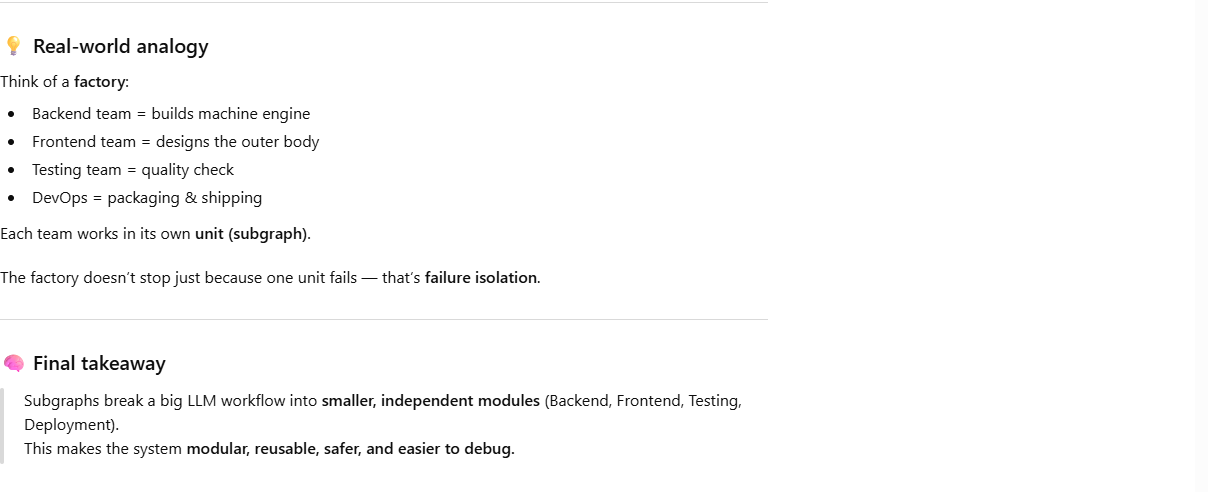

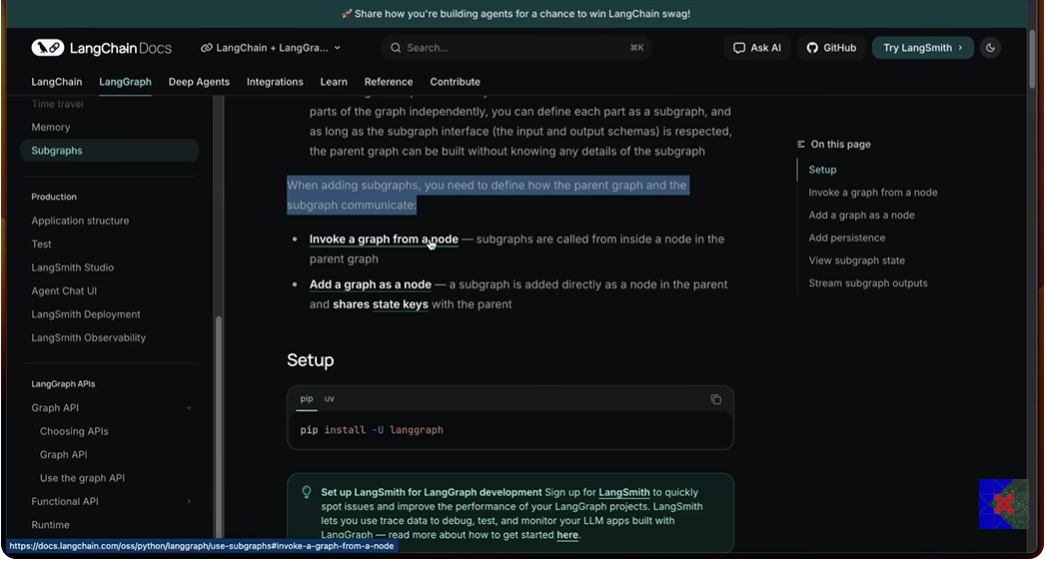

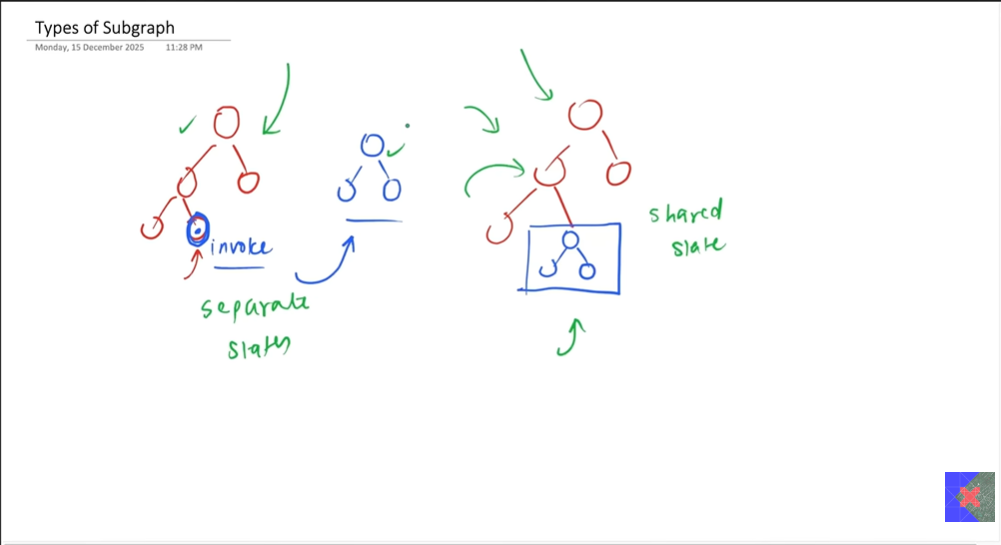

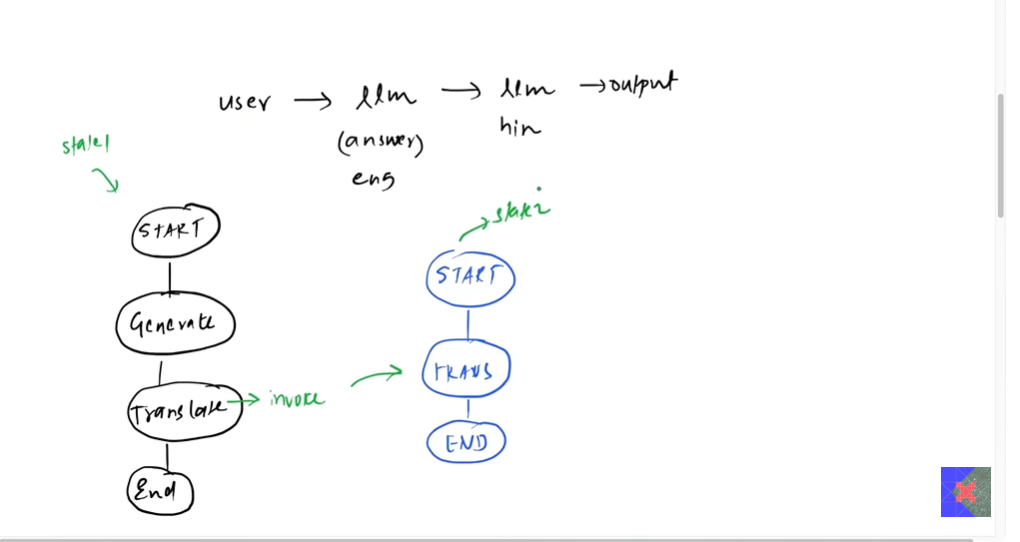

In [6]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv

In [7]:
load_dotenv()

True

In [8]:
class SubState(TypedDict):

    input_text: str
    translated_text: str

In [9]:
subgraph_llm = ChatOpenAI(model='gpt-4o')

In [10]:
def translate_text(state: SubState):

    prompt = f"""
Translate the following text to Hindi.
Keep it natural and clear. Do not add extra content.

Text:
{state["input_text"]}
""".strip()
    
    translated_text = subgraph_llm.invoke(prompt).content

    return {'translated_text': translated_text}

In [1]:
subgraph_builder = StateGraph(SubState)

subgraph_builder.add_node('translate_text', translate_text)

subgraph_builder.add_edge(START, 'translate_text')
subgraph_builder.add_edge('translate_text', END)

subgraph = subgraph_builder.compile()

NameError: name 'StateGraph' is not defined

In [11]:
class ParentState(TypedDict):

    question: str
    answer_eng: str
    answer_hin: str